# Singapore resale price prediction - Data Preprocessing

In [32]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle

In [2]:
df1=pd.read_csv(r"data\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [3]:
df2=pd.read_csv(r"data\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [4]:
df3=pd.read_csv(r"data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
df4=pd.read_csv(r"data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
df5=pd.read_csv(r"data\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                181682 non-null  object 
 1   town                 181682 non-null  object 
 2   flat_type            181682 non-null  object 
 3   block                181682 non-null  object 
 4   street_name          181682 non-null  object 
 5   storey_range         181682 non-null  object 
 6   floor_area_sqm       181682 non-null  float64
 7   flat_model           181682 non-null  object 
 8   lease_commence_date  181682 non-null  int64  
 9   remaining_lease      181682 non-null  object 
 10  resale_price         181682 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [7]:
df5['remaining_lease']=df5['remaining_lease'].str.split(' ').str[0].astype(int)
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [8]:
#combine the dataset using concat

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927885 entries, 0 to 927884
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927885 non-null  object 
 1   town                 927885 non-null  object 
 2   flat_type            927885 non-null  object 
 3   block                927885 non-null  object 
 4   street_name          927885 non-null  object 
 5   storey_range         927885 non-null  object 
 6   floor_area_sqm       927885 non-null  float64
 7   flat_model           927885 non-null  object 
 8   lease_commence_date  927885 non-null  int64  
 9   resale_price         927885 non-null  float64
 10  remaining_lease      218835 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 77.9+ MB


In [9]:
#split the year in the month column
df[['year','month']]=df['month'].str.split('-',expand=True)
df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64')

df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True) #split the storeyrange

#changing the following columns into numeric
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927885 entries, 0 to 927884
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927885 non-null  int64  
 1   town                 927885 non-null  object 
 2   flat_type            927885 non-null  object 
 3   block                927885 non-null  int64  
 4   street_name          927885 non-null  object 
 5   floor_area_sqm       927885 non-null  float64
 6   flat_model           927885 non-null  object 
 7   lease_commence_date  927885 non-null  int64  
 8   resale_price         927885 non-null  float64
 9   remaining_lease      218835 non-null  float64
 10  year                 927885 non-null  int64  
 11  storey_start         927885 non-null  int64  
 12  storey_end           927885 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.0+ MB


In [10]:
#checkig null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [11]:
#handle the null values 
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

mask= df['remaining_lease']>99
df=df[~mask]

In [12]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [13]:
#handle the str error
df['flat_model']=df['flat_model'].str.upper()
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

# Adding a new feature to improve results
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']
df['years_holding']=df['year']-df['lease_commence_date']
current_year =datetime.datetime.now().year

df['current_remaining_lease']=df['remaining_lease']-(current_year-df['year'])
df['age_of_property']=current_year-df['lease_commence_date']

# Descriptive statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,927834.0,6.550173,3.412269,1.000000,4.00000,7.000000,10.00000,1.200000e+01
block,927834.0,348.760166,255.135254,1.000000,127.00000,302.000000,534.00000,9.990000e+02
floor_area_sqm,927834.0,95.688842,25.823236,28.000000,73.00000,93.000000,113.00000,3.070000e+02
lease_commence_date,927834.0,1988.282064,10.669876,1966.000000,1981.00000,1986.000000,1996.00000,2.020000e+03
resale_price,927834.0,320976.125548,170643.322088,5000.000000,193000.00000,298000.000000,418000.00000,1.588000e+06
remaining_lease,927834.0,80.996755,10.794811,41.000000,74.00000,83.000000,90.00000,9.900000e+01
year,927834.0,2006.182937,9.330327,1990.000000,1999.00000,2005.000000,2014.00000,2.024000e+03
storey_start,927834.0,6.683065,4.822589,1.000000,4.00000,7.000000,10.00000,4.900000e+01
storey_end,927834.0,8.697805,4.822580,3.000000,6.00000,9.000000,12.00000,5.100000e+01
price_per_sqm,927834.0,3319.614408,1533.663189,161.290323,2292.45283,2957.746479,4202.12766,1.559140e+04


# Skewness and Outliers

In [15]:
#function for plot 
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0])
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[2])
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [18]:
#skewness handle with log transformation
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])


In [16]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [19]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')
outlier(df,'remaining_lease_log')
outlier(df,'price_per_sqm_log')

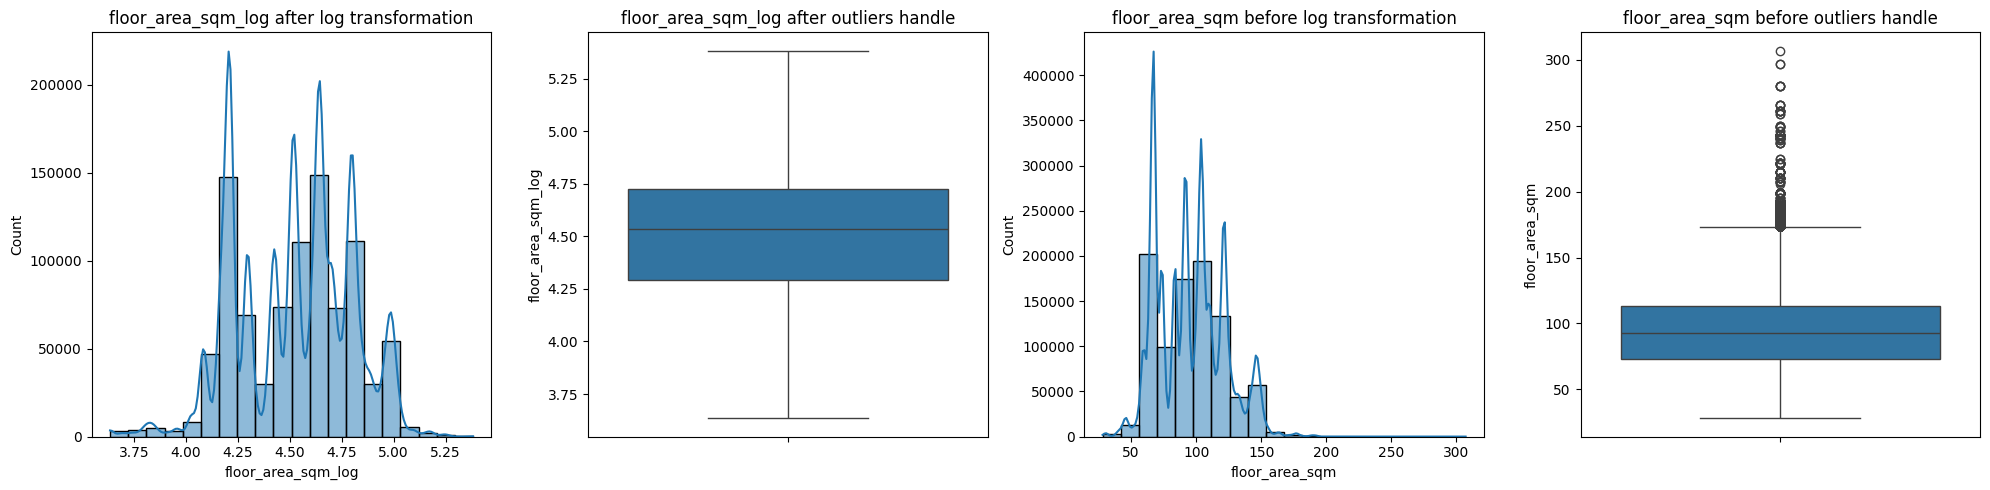

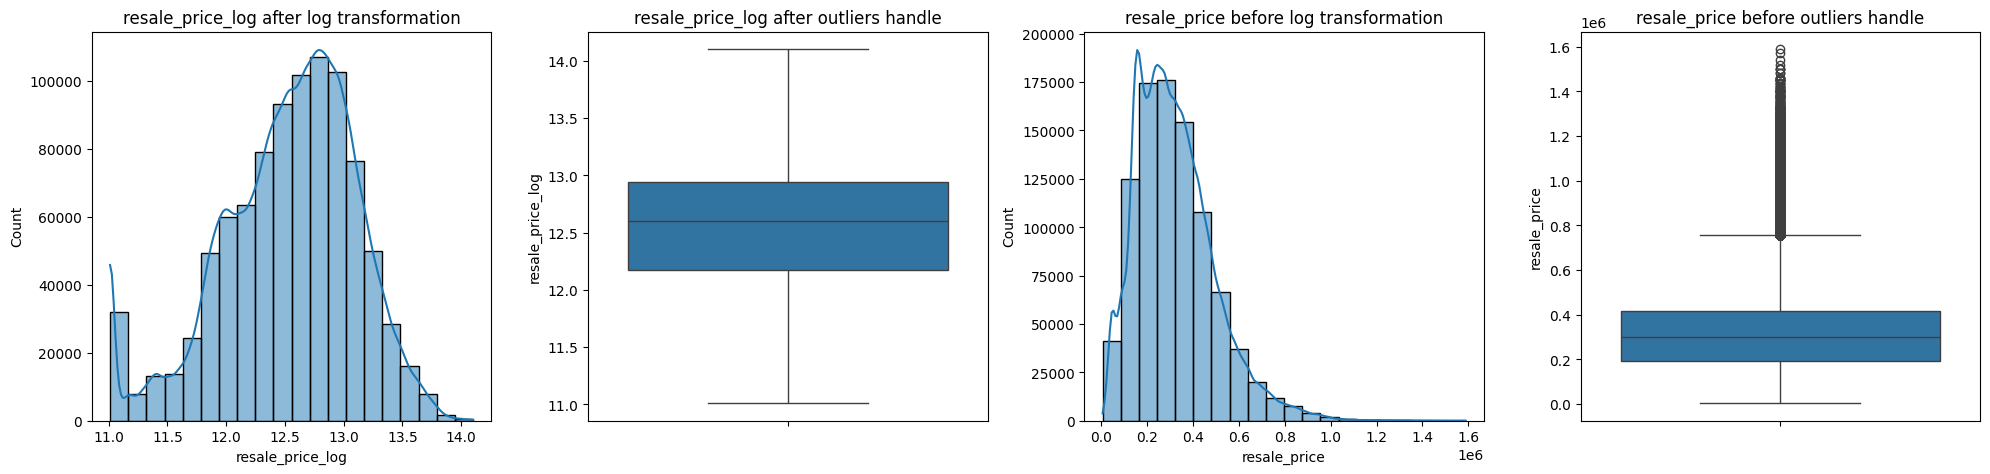

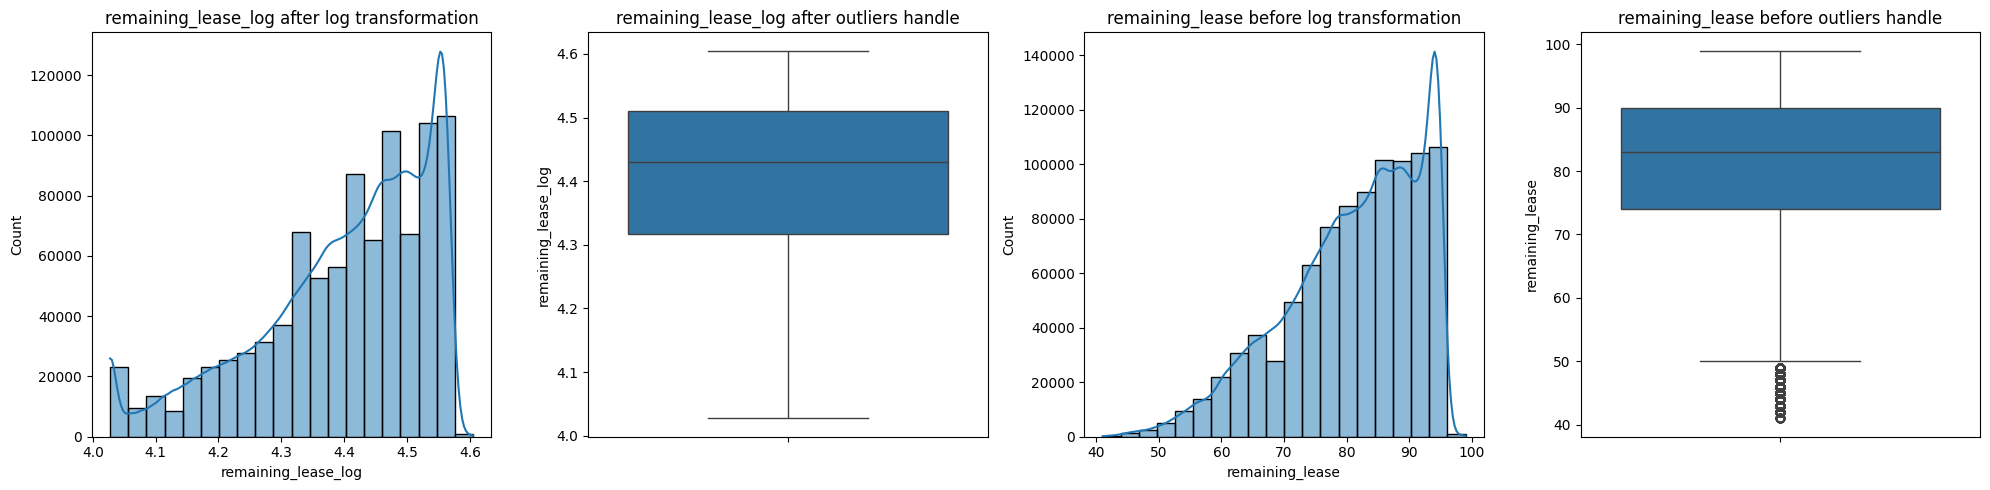

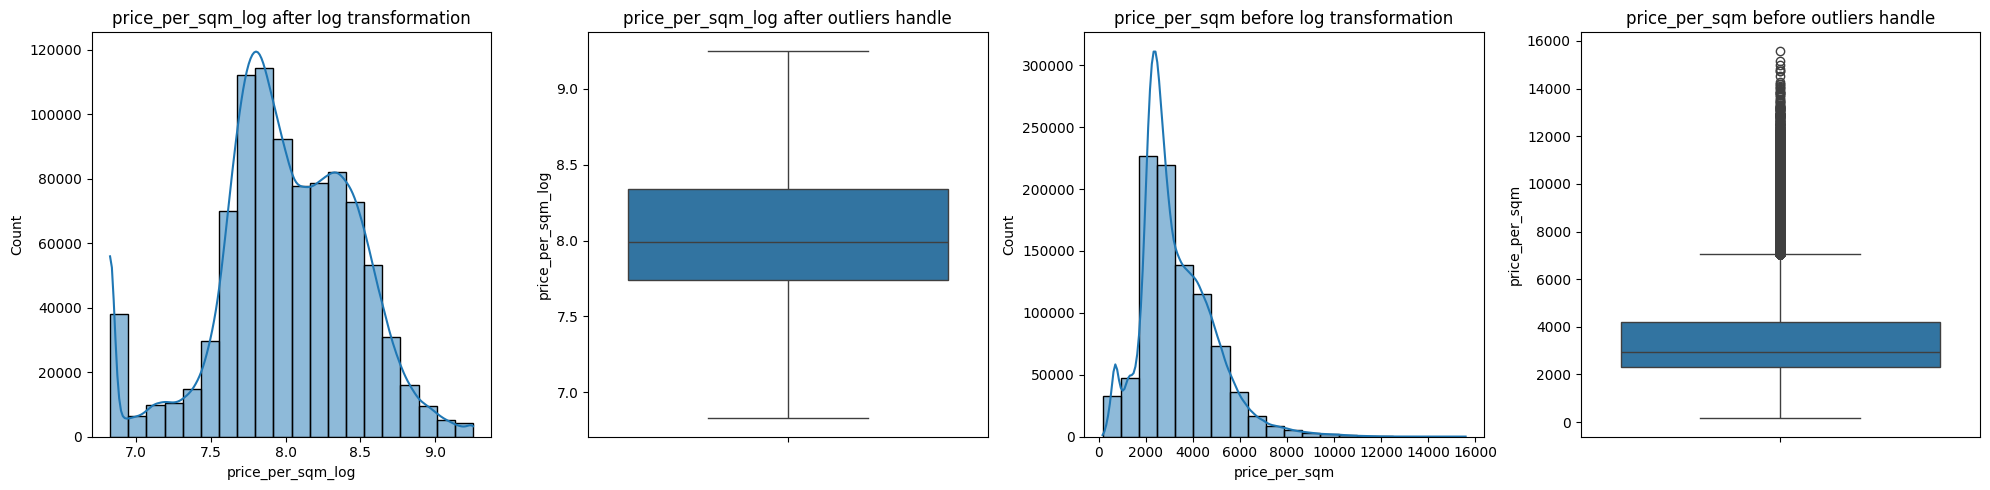

In [20]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)

In [21]:
#drop the columns 
df.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)

Text(0.5, 1.0, 'Correlation of all features with target feature')

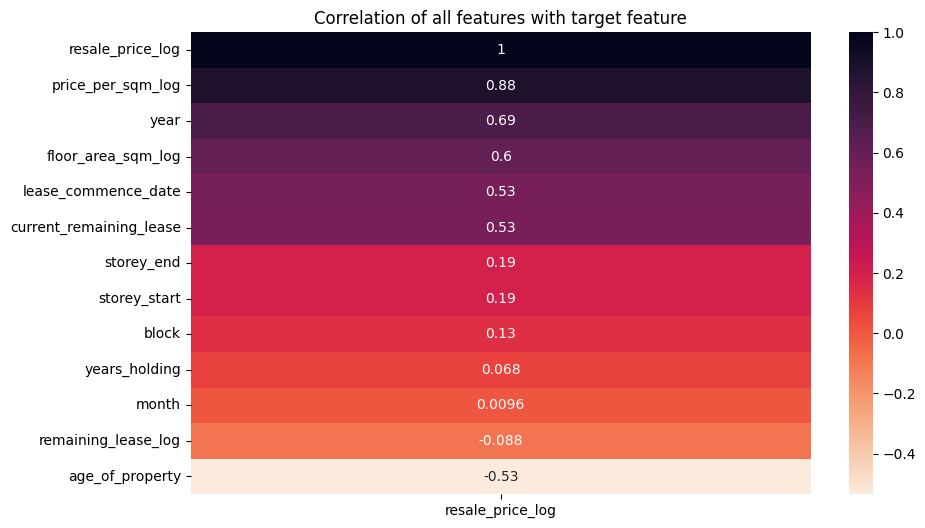

In [22]:
#correlation with heatmap

corr_plt=df[['month','block','floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','year','storey_start',
            'storey_end','price_per_sqm_log','years_holding','current_remaining_lease','age_of_property']].corr()

target_corr=corr_plt['resale_price_log'].sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.heatmap(target_corr.to_frame(),annot=True, cmap='rocket_r')
plt.title('Correlation of all features with target feature')

#  Data_Modeling

In [23]:
df_new=df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927834 entries, 0 to 927884
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    927834 non-null  int64  
 1   town                     927834 non-null  object 
 2   flat_type                927834 non-null  object 
 3   block                    927834 non-null  int64  
 4   flat_model               927834 non-null  object 
 5   lease_commence_date      927834 non-null  int64  
 6   year                     927834 non-null  int64  
 7   storey_start             927834 non-null  int64  
 8   storey_end               927834 non-null  int64  
 9   years_holding            927834 non-null  int64  
 10  current_remaining_lease  927834 non-null  float64
 11  age_of_property          927834 non-null  int64  
 12  floor_area_sqm_log       927834 non-null  float64
 13  resale_price_log         927834 non-null  float64
 14  remaining

In [24]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [25]:
df_new['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [26]:
encoding(df_new,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [27]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [28]:
encoding(df_new,'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [29]:
df_new['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [30]:
encoding(df_new,'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [31]:
df_new[['town','flat_type','flat_model']]=df_new[['town','flat_type','flat_model']].astype('int64')
df_new.head()

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.011259,4.465908,6.828425
1,1,0,0,309,5,1977,1990,4,6,13,52.0,47,3.635067,11.011259,4.465908,6.828425
2,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.011259,4.465908,6.828425
3,1,0,0,309,5,1977,1990,7,9,13,52.0,47,3.635067,11.011259,4.465908,6.828425
4,1,0,2,216,12,1976,1990,4,6,14,51.0,48,4.290459,11.011259,4.454347,6.828425


In [ ]:
df

In [33]:
#split the data into x and y 

x=df_new.drop(['resale_price_log'],axis=1)
y=df_new['resale_price_log']

x.shape,y.shape

((927834, 15), (927834,))

In [47]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [48]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.008390            0.000942                 0.030699  0.997181
DecisionTreeRegressor             0.001380            0.000167                 0.012927  0.999500
RandomForestRegressor             0.001068            0.000091                 0.009538  0.999728
ExtraTreesRegressor               0.001199            0.000104                 0.010208  0.999688
**Best Algorithm:** RandomForestRegressor


In [52]:
# Random forest regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

In [ ]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

In [ ]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

month                      0.0
town                       0.0
flat_type                  0.0
block                      0.0
flat_model                 0.0
lease_commence_date        0.0
year                       0.0
storey_start               0.0
storey_end                 0.0
years_holding              0.0
current_remaining_lease    0.0
age_of_property            0.0
floor_area_sqm_log         0.0
remaining_lease_log        0.0
price_per_sqm_log          0.0
dtype: float64

In [50]:
# store the model using pickle

with open('Decisiontree.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [ ]:
#load the pickle and predict the selling price with regressor model

with open('Decisiontree.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])